100%|██████████| 100/100 [00:30<00:00,  3.30it/s]


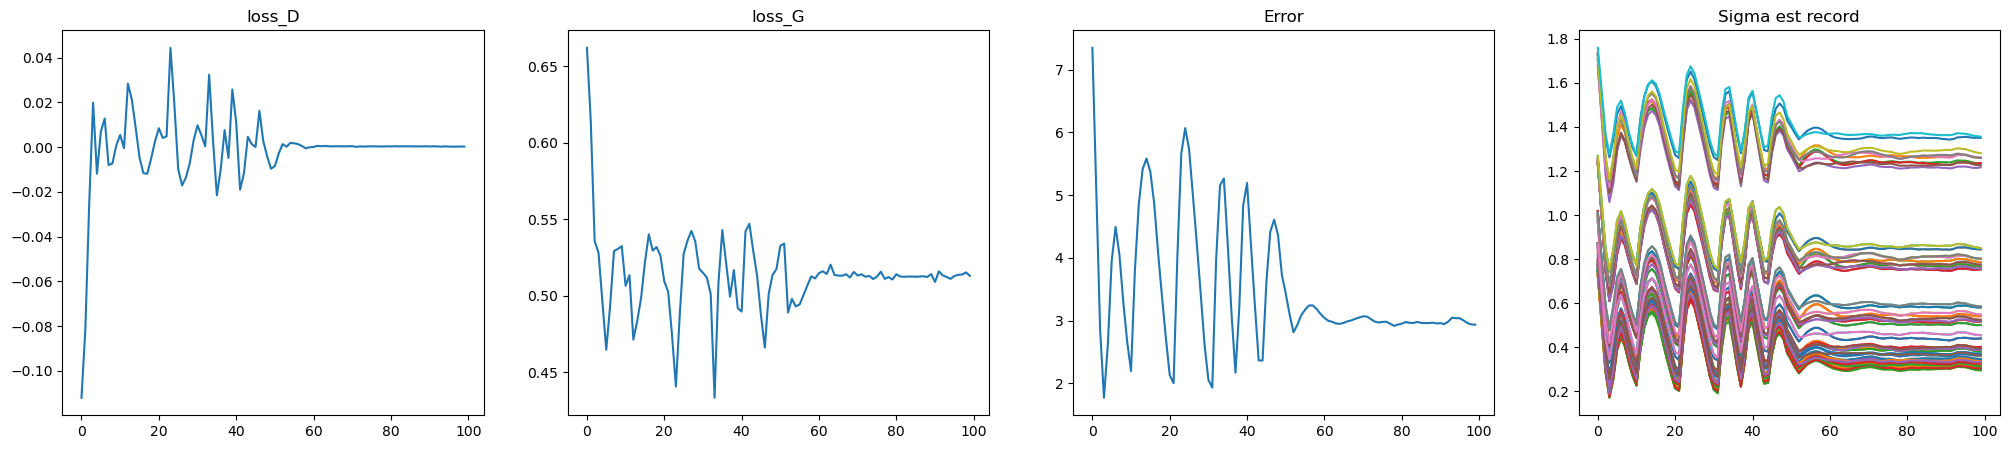

In [7]:
from sigma import Sigma
import numpy as np
import matplotlib.pyplot as plt
from utils import ar_cov, kendall
data_dim = 10
for _ in range(1):
    gan = Sigma(data_dim, 0.2, 'cpu')
    true_mean = np.zeros(data_dim)
    out_mean = np.ones(data_dim) * 6
    gan.dist_init(true_mean, out_mean, ar_cov(data_dim), ar_cov(data_dim))
    gan.data_init(50000, 500)
    gan.model_init()
    gan.optimizer_init(0.01, 0.1, 12, 3, 
                       weight_decay_d=8e-2, weight_decay_g=2.5e-5
                       , step_size=50, gamma=0.3)
    gan.fit(100)
    gan.plot()

In [5]:
gan.G.est_cov()

tensor([[1.4023, 0.9059, 0.6398, 0.5100, 0.4325, 0.3898, 0.3740, 0.3703, 0.3836,
         0.4119],
        [0.9059, 1.3234, 0.8529, 0.5984, 0.4577, 0.3847, 0.3535, 0.3378, 0.3551,
         0.3834],
        [0.6398, 0.8529, 1.3084, 0.8426, 0.5871, 0.4492, 0.3763, 0.3499, 0.3560,
         0.3815],
        [0.5100, 0.5984, 0.8426, 1.2991, 0.8360, 0.5776, 0.4418, 0.3823, 0.3678,
         0.3784],
        [0.4325, 0.4577, 0.5871, 0.8360, 1.3049, 0.8252, 0.5736, 0.4534, 0.4032,
         0.3907],
        [0.3898, 0.3847, 0.4492, 0.5776, 0.8252, 1.2916, 0.8219, 0.5878, 0.4697,
         0.4242],
        [0.3740, 0.3535, 0.3763, 0.4418, 0.5736, 0.8219, 1.2928, 0.8405, 0.5970,
         0.4932],
        [0.3703, 0.3378, 0.3499, 0.3823, 0.4534, 0.5878, 0.8405, 1.2982, 0.8473,
         0.6277],
        [0.3836, 0.3551, 0.3560, 0.3678, 0.4032, 0.4697, 0.5970, 0.8473, 1.3252,
         0.9025],
        [0.4119, 0.3834, 0.3815, 0.3784, 0.3907, 0.4242, 0.4932, 0.6277, 0.9025,
         1.4133]], grad_fn=<

In [33]:
import torch
data = torch.tensor([
    [1, 2, 3],
    [1, 2, 3],
    [2, 2, 4]    
])
A = torch.diag(torch.tensor([1, 2, 3]))
Adata = torch.matmul(A, data.T).T
Adata

tensor([[ 1,  4,  9],
        [ 1,  4,  9],
        [ 2,  4, 12]])

In [12]:
torch.dot(Adata, data.T)

RuntimeError: 1D tensors expected, but got 2D and 2D tensors

In [43]:
single_data = torch.tensor([2, 2, 3])
As = torch.matmul(data, single_data.T)
As, As.T

(tensor([15, 15, 20]), tensor([15, 15, 20]))

In [22]:
torch.matmul(As, single_data)

tensor(120)

In [32]:

data = torch.randn(100, 5)
ken = torch.tensor(kendall(data))
torch.matmul(ken, ken.T) - torch.matmul(ken.T, ken)

tensor([[0.0000e+00, 3.4694e-18, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [3.4694e-18, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]],
       dtype=torch.float64)

In [40]:
import numpy as np
ndata = np.array(data)
torch.matmul(data, data.T).T - ndata @ ndata.T

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])

In [41]:
torch.matmul(data, data.T)

tensor([[14, 14, 18],
        [14, 14, 18],
        [18, 18, 24]])